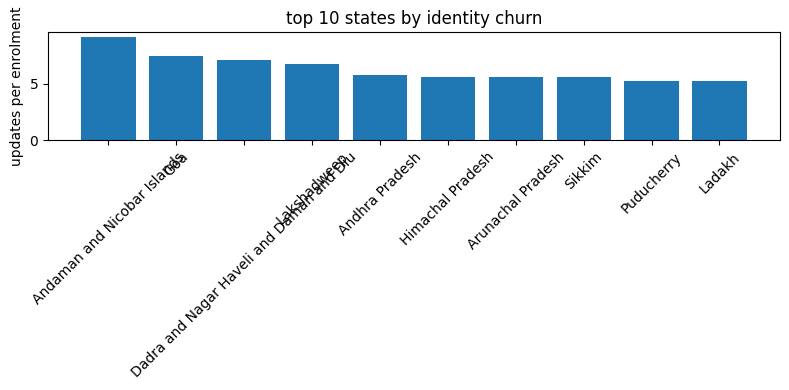

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrol=enrolment.groupby("state").size().reset_index(name="enrolments")

demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")
updates=pd.concat([demo,bio]).groupby("state").size().reset_index(name="updates")

df=enrol.merge(updates,on="state")
df["churn"]=df["updates"]/df["enrolments"]
df=df.sort_values("churn",ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(df["state"],df["churn"])
plt.xticks(rotation=45)
plt.ylabel("updates per enrolment")
plt.title("top 10 states by identity churn")
plt.tight_layout()
plt.show()
